# Exploratory Data Analysis-Terrorism

AIM:-The main objective of this project of Terrorism dataset is to get depth-analysis through Exploratory Data Analysis(EDA),discovering valuable insights and pattern within the dataset. Through this, we intend to unveil trends, pinpoint regions with heightened risk, gain insights into the methods used in attacks, and potentially shed light on the underlying factors that influence terrorist activities.

# Read Data

In [85]:
import numpy as np
import pandas as pd
import csv

In [102]:
data=open("D:\\D.S MUSKAN/Intership\Coderscave\globalterrorismdb_0718dist.csv")
d=pd.read_csv(data)
d.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2520\900645633.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  d=pd.read_csv(data)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [103]:
d.shape #Shape of the data

(181691, 135)

In [104]:
# Checking null values if any
d.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [105]:
d.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [107]:
# checking for duplicates if any
d[d.duplicated()]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [110]:
d.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
null_percentage=(d.isnull().sum()/len(d)).sort_values(ascending=False)
droping_columns=null_percentage[null_percentage>0.2].index
df=d.drop(columns=droping_columns)

In [116]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [117]:
df.shape

(181691, 47)

In [118]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1', 'weaptype1_txt',
       'weapsubtype1', 'weapsubtype1_txt', 'nkill', 'nwound', 'property',
       'ishostkid', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

we eliminate those column which contain more than 20% null values

In [119]:
# Checking null values in df dataset 
df.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
weapsubtype1        20768
weapsubtype1_txt    20768
nkill       

In [120]:
df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday  extended  country  \
0       197000000001   1970       7     2         0       58   
1       197000000002   1970       0     0         0      130   
2       197001000001   1970       1     0         0      160   
3       197001000002   1970       1     0         0       78   
4       197001000003   1970       1     0         0      101   
...              ...    ...     ...   ...       ...      ...   
181686  201712310022   2017      12    31         0      182   
181687  201712310029   2017      12    31         0      200   
181688  201712310030   2017      12    31         0      160   
181689  201712310031   2017      12    31         0       92   
181690  201712310032   2017      12    31         0      160   

               country_txt  region                   region_txt  \
0       Dominican Republic       2  Central America & Caribbean   
1                   Mexico       1                North America  

# Select usefull column for EDA

In [122]:
df.rename(columns={'iyear':"Year",'imonth':"Month", 'iday':"Day",
       'country_txt':"Country",'region_txt':"Region",'city':"City",
       'attacktype1_txt':"Attack_type",'targtype1_txt':"Target_type",
       'targsubtype1_txt':"Target_subtype",'natlty1_txt':"Nationality", 'gname':"Group_name",
       'weaptype1_txt':"Weapon_type",
        'nkill':"Number_kills", 'nwound':"Number_wound",
         },inplace=True)
df=df[["Year","Month","Day","Country","Region","City","Attack_type","Target_type","Target_subtype","Nationality","Group_name","Number_kills","Number_wound","Weapon_type"]]
df

,Year,Month,Day,Country,Region,City,Attack_type,Target_type,Target_subtype,Nationality,Group_name,Number_kills,Number_wound,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,1.0,0.0,Unknown
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,0.0,0.0,Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,NaN,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,NaN,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Somalia,Al-Shabaab,1.0,2.0,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russia,Muslim extremists,2.0,7.0,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Incendiary
181689,2017,12,31,India,South Asia,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,India,Unknown,0.0,0.0,Explosives


In [123]:
df.shape

(181691, 14)

In [124]:
# Per year attacks
df["Year"].value_counts

<bound method IndexOpsMixin.value_counts of 0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: Year, Length: 181691, dtype: int64>

In [126]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

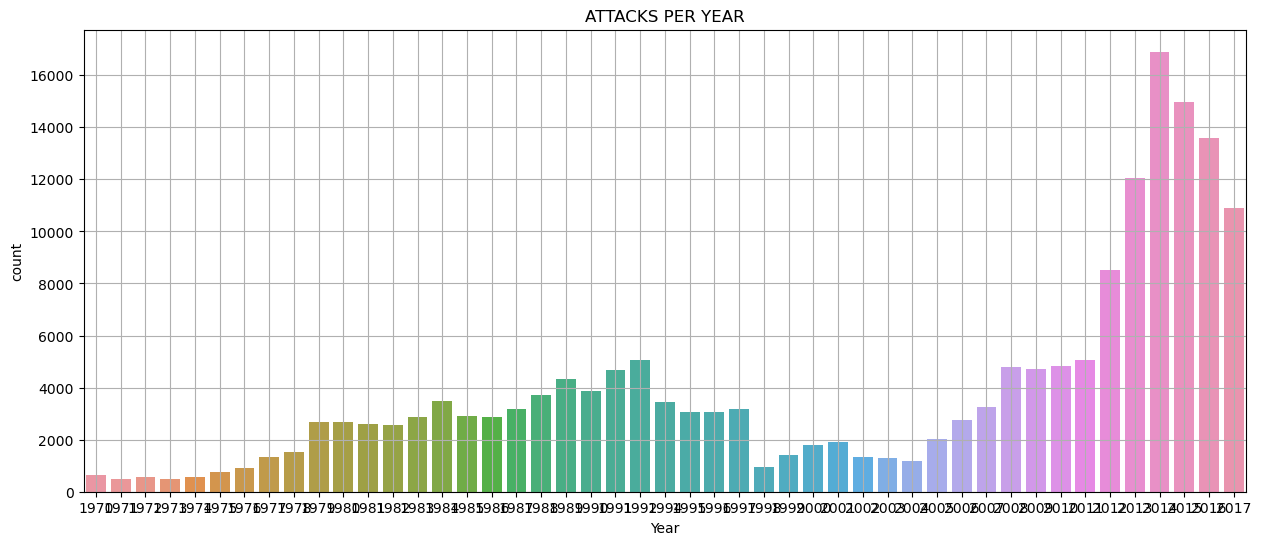

In [128]:
plt.subplots(figsize=(15,6))
sns.countplot(x="Year",data=df)
plt.xticks()
plt.grid()
plt.title("ATTACKS PER YEAR")
plt.show

Per year destroy

In [132]:
cluster=df.groupby("Year")["Number_kills","Number_wound"].sum().reset_index()
cluster

C:\Users\Dell\AppData\Local\Temp\ipykernel_2520\795714758.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster=df.groupby("Year")["Number_kills","Number_wound"].sum().reset_index()


,Year,Number_kills,Number_wound
0,1970,174.0,212.0
1,1971,173.0,82.0
2,1972,566.0,409.0
3,1973,370.0,495.0
4,1974,539.0,865.0
5,1975,617.0,617.0
6,1976,674.0,756.0
7,1977,456.0,518.0
8,1978,1459.0,1600.0
9,1979,2100.0,2506.0


<function matplotlib.pyplot.show(close=None, block=None)>

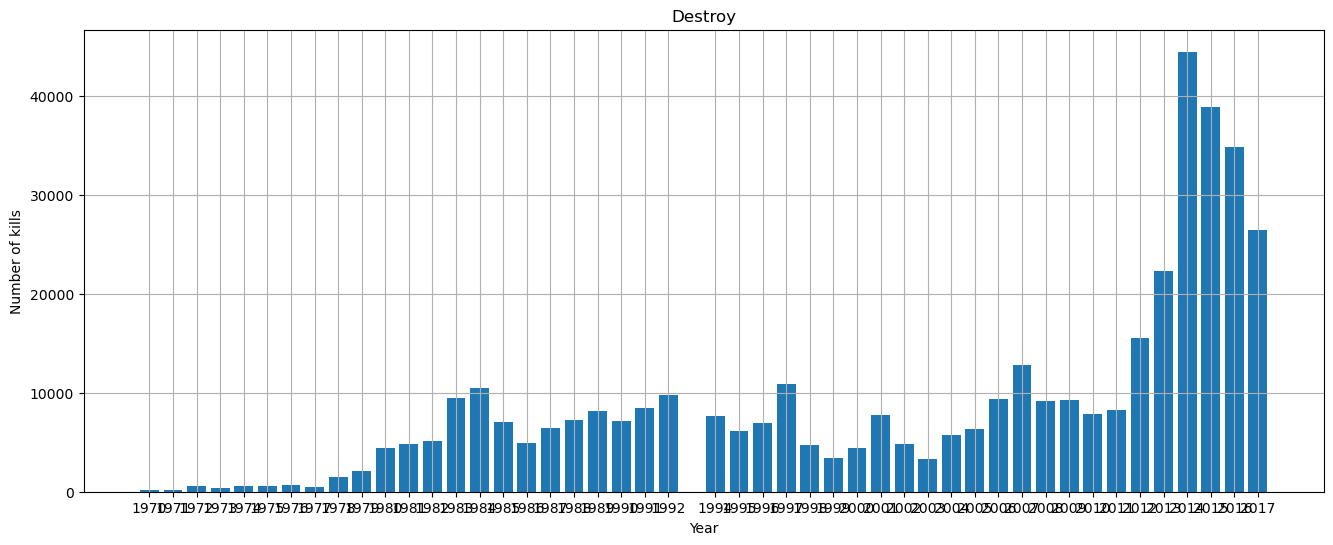

In [133]:
plt.figure(figsize=(16,6))
plt.bar(cluster["Year"],cluster["Number_kills"])
plt.xlabel("Year")
plt.ylabel("Number of kills")
plt.xticks(cluster["Year"])
plt.title("Destroy")
plt.grid()
plt.show

# citywise,countrywise and regionwise attacks

In [136]:
df["City"].value_counts
df["Country"].value_counts
df["Region"].value_counts

<bound method IndexOpsMixin.value_counts of 0         Central America & Caribbean
1                       North America
2                      Southeast Asia
3                      Western Europe
4                           East Asia
                     ...             
181686             Sub-Saharan Africa
181687     Middle East & North Africa
181688                 Southeast Asia
181689                     South Asia
181690                 Southeast Asia
Name: Region, Length: 181691, dtype: object>

# Most attacked country

In [142]:
print("Most attacked")
print('Country :',df['Country'].value_counts().idxmax())
print('Year :',df['Year'].value_counts().idxmax())
print('Month :',df['Month'].value_counts().idxmax())
print('Region :',df['Region'].value_counts().idxmax())
print('Weapon_type :',df['Weapon_type'].value_counts().idxmax())

Most attacked
Country : Iraq
Year : 2014
Month : 5
Region : Middle East & North Africa
Weapon_type : Explosives


# Least attacked country

In [145]:
print("Least attacked")
print('Country :',df['Country'].value_counts().idxmin())
print('Year :',df['Year'].value_counts().idxmin())
print('Month :',df['Month'].value_counts().idxmin())
print('Region :',df['Region'].value_counts().idxmin())
print('Weapon_type :',df['Weapon_type'].value_counts().idxmin())

Least attacked
Country : Vatican City
Year : 1971
Month : 0
Region : Australasia & Oceania
Weapon_type : Radiological


# Terrorism Attack visualization on world map

In [148]:
import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts, 
                    locations='Country',
                    locationmode='country names',
                    color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',
                    color_continuous_scale='reds')

fig.show()

Key findings:-

* In Years 1971 terrorist attacks least while 2014,15,16 are witnessed maximum attacks. 2014 is the most attacks occured year.

* In 2014 ,44490.0 were killed and 41128 people were wounded.

* Countries called Iraq witnessed the most of terrorist and vatican city least,facing .Iraq faced around 24600 attacks in total.

* Iraq mostly use Explosive weapons and vatican city (least attacked) use Radiological weapon.

* Regions Middle east & North Africa,Australasia & Oceania witnessed the most and least of terrorist attacks respectively.

In conclusion, Exploratory data analysis of terrorism data plays a crucial role in understanding and addressing the global terrorism threat. It assists in identifying trends, assessing risk regions, and gaining insights into the nature of attacks.Utilizing various visualization methods, such as bar charts has proven effective in simplifying complex datasets. The visualization via worldmap provide a clear and concise way to comprehend the intricate nature of terrorist incidents.The years 2014, 2015, and 2016 experienced a significant surge in terrorist attacks, with 2014 being the year with the highest number of recorded attacks.Iraq,  most heavily affected by terrorist attacks, with Iraq enduring the highest number of attacks. Their preferred method of attack was bombings or explosives. 